In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Obtaning the df. about 

In [3]:
df_suicide = pd.read_csv('data/master.csv')

In [4]:
df_suicide.sample()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
29319,El Salvador,2018,male,55-74 years,34.0,6276342,0.541717,El Salvador2018,0.685073,26020850000,4052.624775,G.I. Generation


In [5]:
df_suicide.country.unique() # checking if United Kingdom is included in the list of countries of the DF

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

### Cleaning data in order to get the suicide rates from 2005 in the United Kingdom to see the pre and post retransmission of Love Island

In [6]:
import src.cleaning as clean

In [7]:
df_suicide = clean.cl_colm(df_suicide) # cleaning columns

In [8]:
df_suicide_uk = clean.cl_country_year_null(df_suicide) # cleaning countries, years<2004 and null values


In [9]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
26753,United Kingdom,2008,male,25-34 years,617.0,3984635,Generation X


## Obtaining via web scraping the releases Love Island until 2020

In [10]:
import src.scrp as sc

### Getting the info from Love Island 

In [11]:
url='https://thetvdb.com/series/love-island/allseasons/official'

In [12]:
soup = sc.extrc(url) # Importing all the info from the website

In [13]:
love_island_date = soup.find_all("ul", attrs={'class':'list-inline text-muted'}) # Getting the dates of each episode
love_island_date[1]

<ul class="list-inline text-muted">
<li>June 8, 2015</li>
<li>ITV2</li>
</ul>

### Cleaning the data for the dates

In [14]:
lst_date= sc.clearance_date(love_island_date)

In [28]:
for i in lst_date:
#    for j in i:
#        print (j)

June
7
2015
June
8
2015
June
9
2015
June
10
2015
June
11
2015
June
13
2015
June
14
2015
June
14
2015
June
16
2015
June
17
2015
June
18
2015
June
20
2015
June
21
2015
June
22
2015
June
23
2015
June
24
2015
June
25
2015
June
27
2015
June
28
2015
June
29
2015
June
30
2015
July
1
2015
July
2
2015
July
4
2015
July
5
2015
July
6
2015
July
7
2015
July
8
2015
July
9
2015
July
10
2015
July
12
2015
July
13
2015
July
14
2015
July
15
2015
May
30
2016
May
31
2016
June
1
2016
June
2
2016
June
3
2016
June
4
2016
June
5
2016
June
6
2016
June
7
2016
June
8
2016
June
9
2016
June
10
2016
June
11
2016
June
12
2016
June
13
2016
June
14
2016
June
15
2016
June
16
2016
June
17
2016
June
18
2016
June
19
2016
June
20
2016
June
21
2016
June
22
2016
June
23
2016
June
24
2016
June
25
2016
June
26
2016
June
27
2016
June
28
2016
June
29
2016
June
30
2016
July
1
2016
July
2
2016
July
3
2016
July
4
2016
July
5
2016
July
6
2016
July
7
2016
July
8
2016
July
9
2016
July
10
2016
July
11
2016
July
17
2016
June
5
2017
June


In [25]:
lst_date

[['June', '7', '2015'],
 ['June', '8', '2015'],
 ['June', '9', '2015'],
 ['June', '10', '2015'],
 ['June', '11', '2015'],
 ['June', '13', '2015'],
 ['June', '14', '2015'],
 ['June', '14', '2015'],
 ['June', '16', '2015'],
 ['June', '17', '2015'],
 ['June', '18', '2015'],
 ['June', '20', '2015'],
 ['June', '21', '2015'],
 ['June', '22', '2015'],
 ['June', '23', '2015'],
 ['June', '24', '2015'],
 ['June', '25', '2015'],
 ['June', '27', '2015'],
 ['June', '28', '2015'],
 ['June', '29', '2015'],
 ['June', '30', '2015'],
 ['July', '1', '2015'],
 ['July', '2', '2015'],
 ['July', '4', '2015'],
 ['July', '5', '2015'],
 ['July', '6', '2015'],
 ['July', '7', '2015'],
 ['July', '8', '2015'],
 ['July', '9', '2015'],
 ['July', '10', '2015'],
 ['July', '12', '2015'],
 ['July', '13', '2015'],
 ['July', '14', '2015'],
 ['July', '15', '2015'],
 ['May', '30', '2016'],
 ['May', '31', '2016'],
 ['June', '1', '2016'],
 ['June', '2', '2016'],
 ['June', '3', '2016'],
 ['June', '4', '2016'],
 ['June', '5', '2

In [20]:
year= sc.def_year(lst_date)
year[1]

IndexError: list index out of range

In [21]:
month= sc.def_month(lst_date)
month[0]

IndexError: list index out of range

### Getting the data of seasons and episodes

In [3]:
love_island_episode= soup.find_all("span", attrs={'class':'text-muted'}) # Getting the list of episodes with seasons
love_island_episode[10]

NameError: name 'soup' is not defined

In [4]:
import src.scrp_epis as sc2

In [20]:
season_episode = sc2.episode_season(love_island_episode) #split the season and episodes

In [21]:
lst_episodes = sc2.episodes(season_episode) # creating a list of episodes to include in a new DF

In [22]:
lst_seasons = sc2.episodes(season_episode)# creating a list of seasons linked with episodes to include in a new DF

### Creating a DF with all the data above

In [23]:
import src.loveislanddf as lidf

In [24]:
love_island_dict=lidf.dictionary(lst_seasons,lst_episodes,year,month) # defining a dictionary of lists

In [25]:
df_loveisland_until_2020= lidf.dfloveisland (love_island_dict) # defining the dictionary

In [26]:
df_loveisland_until_2020.sample()

,Season,Episode,Year,Month
214,28,28,2019,June


## Analysis

### checking the information can be related with both DF, in this cas, the years

In [27]:
import src.groupby as gb

In [28]:
df_loveisland_until_2020.Season.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [29]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
26838,United Kingdom,2015,male,55-74 years,906.0,6716557,Boomers


In [30]:
df_suicide_uk.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2019, 2018, 2017])

In [31]:
df_suicide_ages = gb.group_suici_age (df_suicide_uk) # Group by ages and years the suicide rates
df_suicide_ages


suicides_no
age         year             
15-24 years 2005        384.0
            2006        382.0
            2007        379.0
            2008        404.0
            2009        416.0
...                       ...
75+ years   2014        340.0
            2015        381.0
            2017        338.0
            2018        413.0
            2019        372.0

[84 rows x 1 columns]

In [32]:
df_distr_epi = gb.group_season_epi (df_loveisland_until_2020)
df_distr_epi

Episode
Season Year         
1      2015        1
       2016        1
       2017        1
       2018        1
       2019        1
...              ...
56     2019        1
57     2018        1
       2019        1
58     2018        1
       2019        1

[245 rows x 1 columns]

## Figures for suicide

- As can be check of the graph below the ages in between 16-34 years old have a raise on the suicide rates

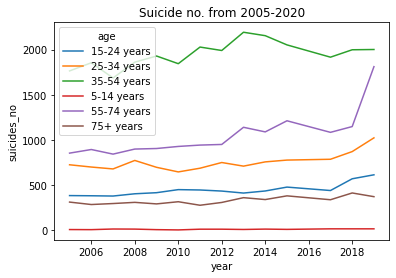

In [33]:
suicide_ages = sns.lineplot(data=df_suicide_ages, x="year", y="suicides_no", hue="age").set(title="Suicide no. from 2005-2020");

In [34]:
# suicide_ages.figure.savefig("age_suic.jpg", dpi=1000)

## Figures for Love island

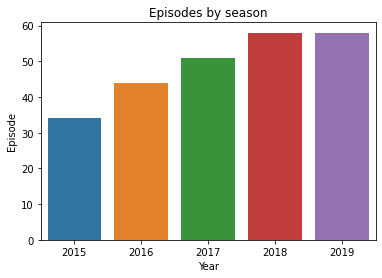

In [35]:
epis_year = sns.barplot(data=df_loveisland_until_2020, x="Year", y="Episode", estimator="count", ci=None).set(title="Episodes by season");

In [36]:
# epis_year.figure.savefig("epis_years.jpg", dpi=1000)

## Getting all the graphs together

### Join the DF by the year

In [37]:
df_suicide_uk.sample()

,country,year,sex,age,suicides_no,population,generation
26841,United Kingdom,2015,female,35-54 years,473.0,8881944,Generation X


In [38]:
import src.joining as jn

In [39]:
df_join= jn.join_df(df_suicide_uk, df_loveisland_until_2020)# Joined both dataframes to get a graph of episodes(count) and suicide no.

In [40]:
df_join = jn.r_index(df_join)# Changing the index and creating the column "year"

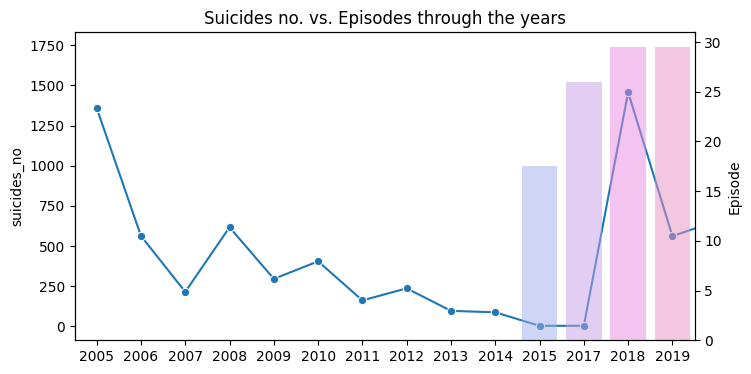

In [41]:
fig = jn.year_suic_season(df_join);
fig.figure.savefig("su_ep.jpg", dpi=1000)